# Covariance matrix

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Variance

The variance of random variable $X$ is

${\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}},$

where $\mu$ is mean value:

${\displaystyle \mu ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}.}$

Note: the variance is squared standard deviation (`std`).

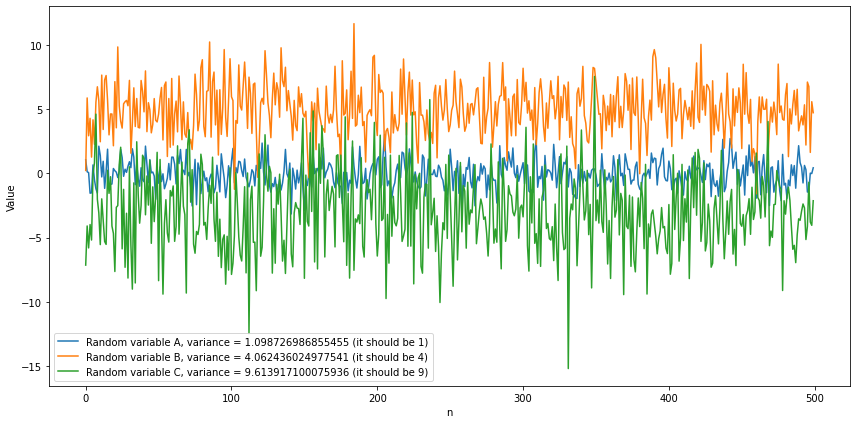

In [2]:
N = 500

variables = [
    {"name": "A", "mean": 0, "std": 1},
    {"name": "B", "mean": 5, "std": 2},
    {"name": "C", "mean": -3, "std": 3},
]

plt.figure(figsize=(12, 6))

for idx, params in enumerate(variables):
    X = np.random.normal(params["mean"], params["std"], N)
    varX = ( (X - X.mean()) ** 2).mean()

    plt.plot(X, label="Random variable {}, variance = {} (it should be {})".format(params["name"], varX, params["std"]**2))
    plt.tight_layout()
    plt.legend()
    plt.ylabel("Value")
    plt.xlabel("n")

plt.show()

## Covariance

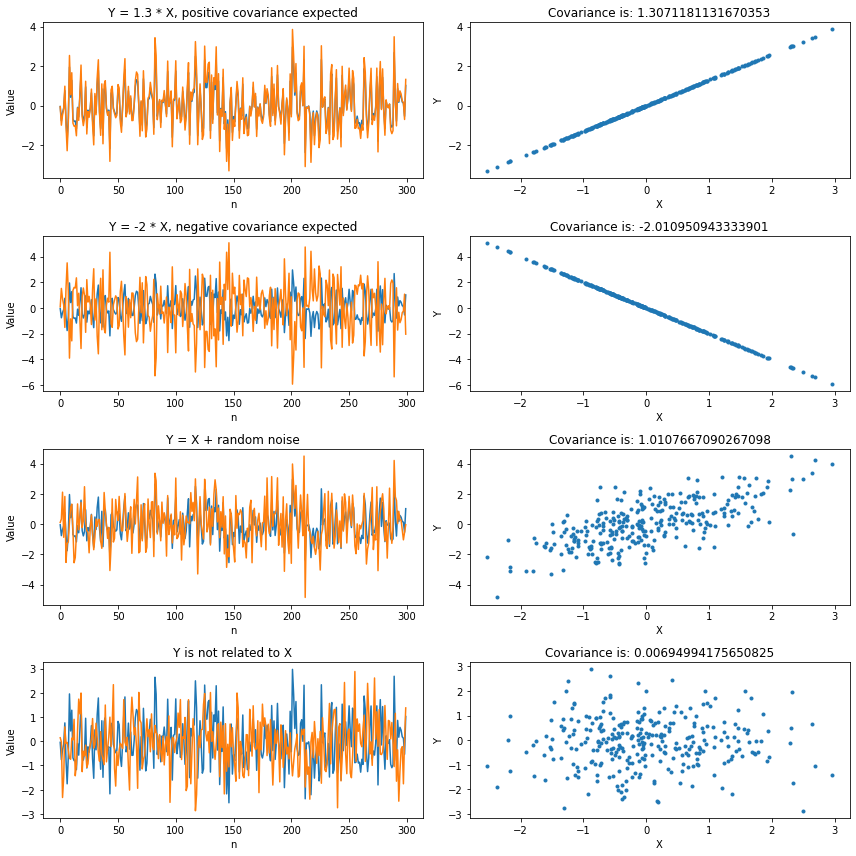

In [3]:
N = 300

X = np.random.normal(0, 1, N)

B = -2 * X
C = np.random.normal(0, 1, N)

variables = [
    {"Y": 1.3 * X, "note": "Y = 1.3 * X, positive covariance expected"},
    {"Y": -2 * X, "note": "Y = -2 * X, negative covariance expected"},
    {"Y": X + np.random.normal(0, 1, N), "note": "Y = X + random noise"},
    {"Y": np.random.normal(0, 1, N), "note": "Y is not related to X"},
]


plt.figure(figsize=(12, 12))

for idx, params in enumerate(variables):
    Y = params["Y"]
    covarXY = ( (X - X.mean()) * (Y - Y.mean()) ).mean()
    
    plt.subplot(len(variables), 2, (2 * idx) + 1)
    plt.plot(X)
    plt.plot(Y)
    plt.title("{}".format(params["note"]))
    plt.ylabel("Value")
    plt.xlabel("n")

    plt.subplot(len(variables), 2, (2 * idx) + 2)
    plt.plot(X, Y, ".")
    plt.title("Covariance is: {}".format(covarXY))
    plt.ylabel("Y")
    plt.xlabel("X")

plt.tight_layout()
    
plt.show()


## Covariance matrix

In [4]:
def show_matrix(names):
    for name1 in names:
        row = "  ".join(["Cov({},{})".format(name1, name2) for name2 in names])
        print(row)

Covariance matrix structure for variables X and Y:

In [5]:
show_matrix("XY")

Cov(X,X)  Cov(X,Y)
Cov(Y,X)  Cov(Y,Y)


Covariance matrix structure for variables A, ..., F:

In [6]:
show_matrix("ABCDEF")

Cov(A,A)  Cov(A,B)  Cov(A,C)  Cov(A,D)  Cov(A,E)  Cov(A,F)
Cov(B,A)  Cov(B,B)  Cov(B,C)  Cov(B,D)  Cov(B,E)  Cov(B,F)
Cov(C,A)  Cov(C,B)  Cov(C,C)  Cov(C,D)  Cov(C,E)  Cov(C,F)
Cov(D,A)  Cov(D,B)  Cov(D,C)  Cov(D,D)  Cov(D,E)  Cov(D,F)
Cov(E,A)  Cov(E,B)  Cov(E,C)  Cov(E,D)  Cov(E,E)  Cov(E,F)
Cov(F,A)  Cov(F,B)  Cov(F,C)  Cov(F,D)  Cov(F,E)  Cov(F,F)


Keep in mind `Cov(A,B)` = `Cov(B,A)`.

### Example with 6 random unrelated variables

In [7]:
DATA = np.random.normal(0, 1, (6, 1000))

cov_matrix = np.cov(DATA)

print(np.round(cov_matrix, 3))

[[ 1.006e+00  3.800e-02  8.000e-03  2.400e-02 -3.300e-02 -3.800e-02]
 [ 3.800e-02  1.053e+00  2.600e-02 -1.000e-03  3.900e-02 -3.800e-02]
 [ 8.000e-03  2.600e-02  1.046e+00  6.000e-03 -8.300e-02  1.000e-02]
 [ 2.400e-02 -1.000e-03  6.000e-03  1.001e+00 -4.600e-02 -1.600e-02]
 [-3.300e-02  3.900e-02 -8.300e-02 -4.600e-02  9.330e-01  4.500e-02]
 [-3.800e-02 -3.800e-02  1.000e-02 -1.600e-02  4.500e-02  9.520e-01]]


Notice the diagonal pattern (nicely visible if we display the matrix as a heatmap):

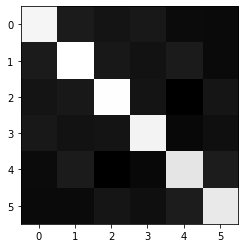

In [8]:
plt.imshow(cov_matrix, cmap='gray')
plt.show()

### Example with somehow related variables

In [9]:
N = 1000
X = np.random.normal(0, 1, N)
Y = np.random.normal(3, 2, N)

DATA = np.array([
    X,
    2 * X,
    Y,
    -0.5 * Y,
    X + Y,
    3 * X - 2 * Y,
])

cov_matrix = np.cov(DATA)

print(np.round(cov_matrix, 3))

[[ 1.0050e+00  2.0090e+00 -4.9000e-02  2.5000e-02  9.5500e-01  3.1130e+00]
 [ 2.0090e+00  4.0180e+00 -9.9000e-02  4.9000e-02  1.9100e+00  6.2250e+00]
 [-4.9000e-02 -9.9000e-02  3.9170e+00 -1.9590e+00  3.8680e+00 -7.9830e+00]
 [ 2.5000e-02  4.9000e-02 -1.9590e+00  9.7900e-01 -1.9340e+00  3.9920e+00]
 [ 9.5500e-01  1.9100e+00  3.8680e+00 -1.9340e+00  4.8230e+00 -4.8700e+00]
 [ 3.1130e+00  6.2250e+00 -7.9830e+00  3.9920e+00 -4.8700e+00  2.5304e+01]]


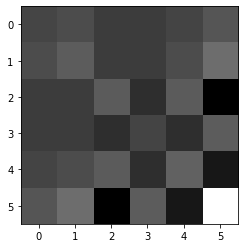

In [10]:
plt.imshow(cov_matrix, cmap='gray')
plt.show()